<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/TimeEvolution2Qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip
import numpy as np
import matplotlib.pyplot as plt
from qutip import *


In [ ]:
# Initial density matrix
psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


In [ ]:
omega_0 = 1.0  # for simplicity, set your value
omega = 1.0    # frequency of sinusoidal dependence

# Operators
sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmax())

def H_t(t, args):
    return omega_0 * np.sin(omega * t) * sz1 * sz2


In [ ]:
times = np.linspace(0, 10, 500)  # choose a suitable time range and number of points
result = mesolve(H_t, rho0, times, [], [])


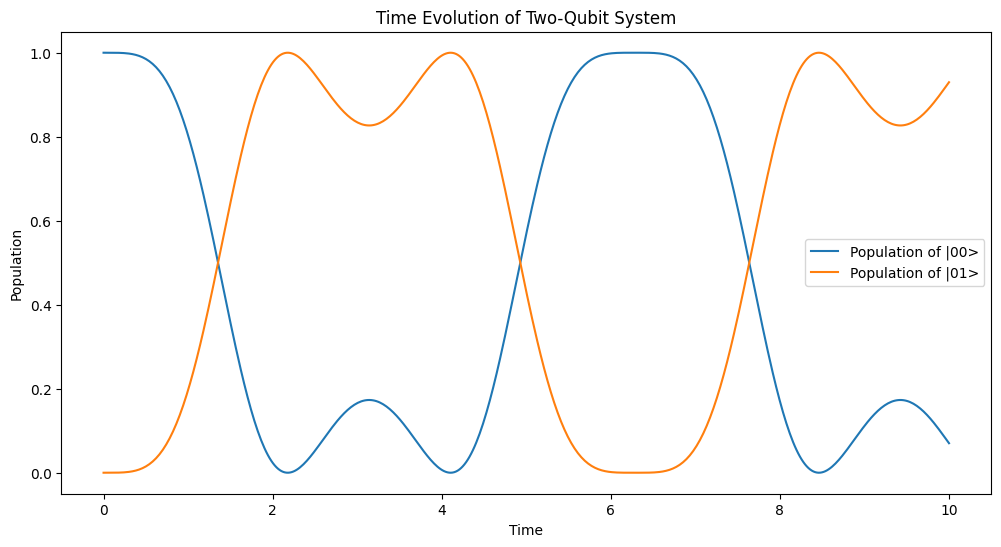

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(times, [abs(rho[0, 0]) for rho in result.states], label='Population of |00>')
plt.plot(times, [abs(rho[1, 1]) for rho in result.states], label='Population of |01>')
# add other plots as needed
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Time Evolution of Two-Qubit System')
plt.show()
